# Importing  Libraries and Datasets

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [204]:
df=pd.read_csv("Ecommerce_Customers.csv")
df

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Basic understanding of dataset

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### The dataset consists of a total of 8 columns, with 3 columns of object data type and the remaining 5 columns as float data type.

In [210]:
df=df.round(2)

### Observing the float data type variables, it is noticeable that they contain many decimal places, so we will round them off to two decimal places.


In [213]:
df.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,33.053340,12.052620,37.060480,3.53336,499.314240
std,0.992513,0.994418,1.010555,0.99926,79.314764
min,29.530000,8.510000,33.910000,0.27000,256.670000
25%,32.340000,11.390000,36.347500,2.93000,445.037500
50%,33.085000,11.980000,37.070000,3.53500,498.890000
75%,33.712500,12.752500,37.720000,4.13000,549.312500
max,36.140000,15.130000,40.010000,6.92000,765.520000


# EDA

In [216]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [218]:
df.duplicated().sum()

0

### No null values and duplicate values are present in the data.


In [221]:
df = df.select_dtypes(include=['float64', 'int64'])
df.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027681,-0.034859,0.060123,0.355046
Time on App,-0.027681,1.000000,0.082285,0.029240,0.499315
Time on Website,-0.034859,0.082285,1.000000,-0.047443,-0.002601
Length of Membership,0.060123,0.029240,-0.047443,1.000000,0.809184
Yearly Amount Spent,0.355046,0.499315,-0.002601,0.809184,1.000000


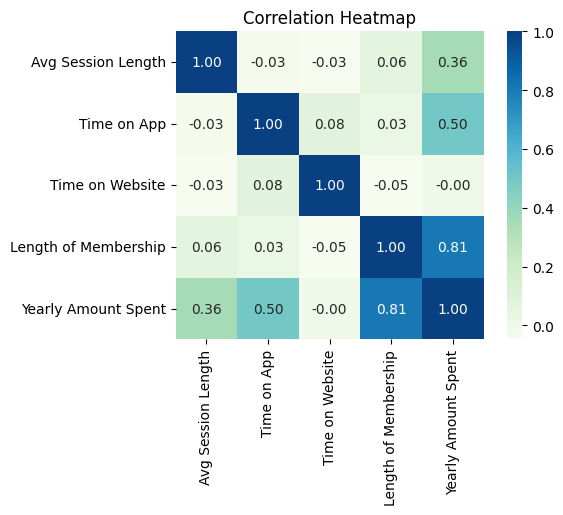

In [223]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='GnBu', square=True)
plt.title('Correlation Heatmap')
plt.show()

### Length of Membership,Time on App and Avg session Length has positive correlation
### Time on Website has a very weak correlation with Yearly Amount Spent,suggesting that it may not be a significant factor in determining spending.

In [226]:
numerical_features = ['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']


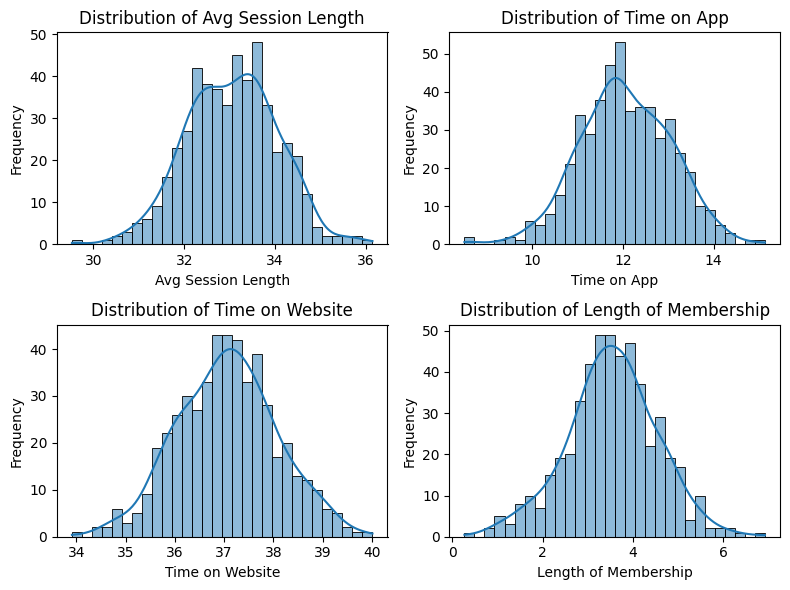

In [228]:
plt.figure(figsize=(8, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)  
    sns.histplot(df[feature], bins=30, kde=True)  
    plt.title(f'Distribution of {feature}')  
    plt.xlabel(feature)  
    plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()

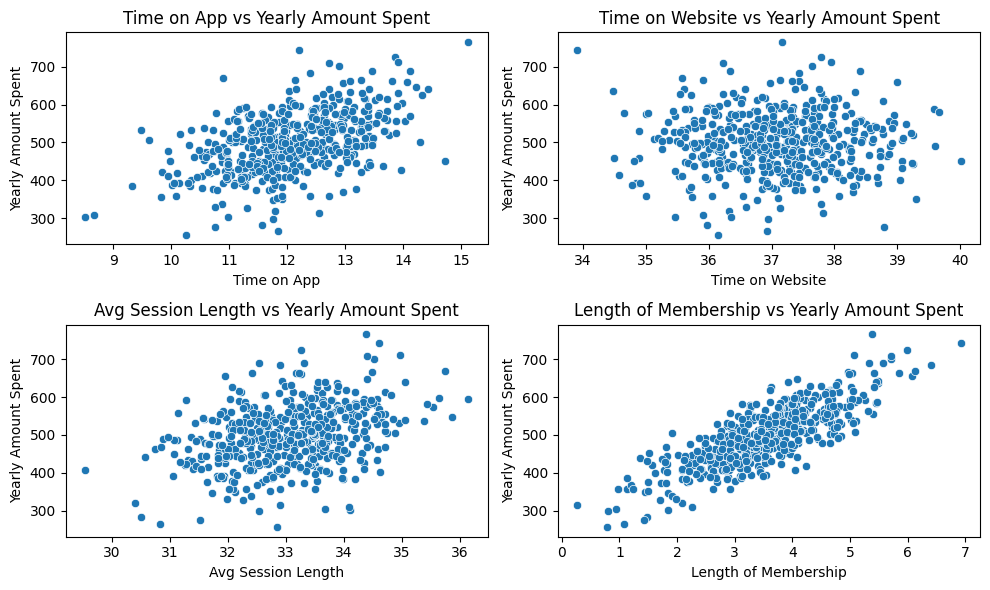

In [229]:
# Create scatter plots
plt.figure(figsize=(10, 6))

# Scatter plot for Time on App vs Yearly Amount Spent
plt.subplot(2, 2, 1)
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')

# Scatter plot for Time on Website vs Yearly Amount Spent
plt.subplot(2, 2, 2)
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.title('Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')

plt.subplot(2, 2,3 )
sns.scatterplot(x='Avg Session Length', y='Yearly Amount Spent', data=df)
plt.title('Avg Session Length vs Yearly Amount Spent')
plt.xlabel('Avg Session Length')
plt.ylabel('Yearly Amount Spent')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')


plt.tight_layout()
plt.show()


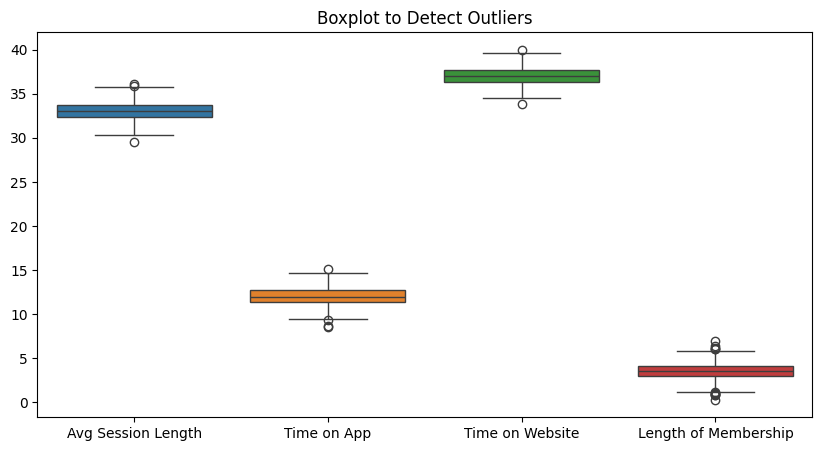

In [230]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Avg Session Length','Time on App','Time on Website','Length of Membership']])
plt.title('Boxplot to Detect Outliers')
plt.show()

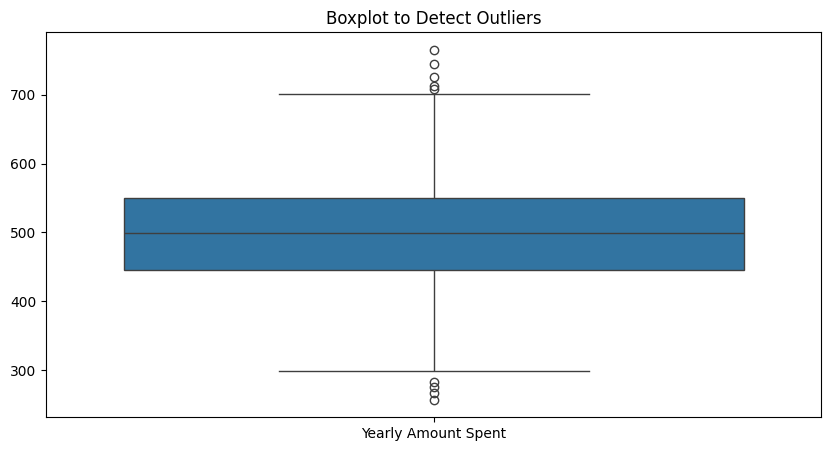

In [232]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Yearly Amount Spent']])
plt.title('Boxplot to Detect Outliers')
plt.show()

# Dropping the Outliers

In [236]:
import pandas as pd

def calculate_outliers_percentage(df, columns):
    total_rows = len(df)
    outliers_info = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total_rows) * 100
        
        # Store the results
        outliers_info[column] = {
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        }
    
    return pd.DataFrame(outliers_info).T

# List of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate and display outlier percentage for each column
outliers_summary = calculate_outliers_percentage(df, numeric_columns)
print(outliers_summary)


                      Outlier Count  Outlier Percentage
Avg Session Length              3.0                 0.6
Time on App                     4.0                 0.8
Time on Website                 2.0                 0.4
Length of Membership           12.0                 2.4
Yearly Amount Spent             9.0                 1.8


In [239]:
import pandas as pd

# Assuming 'df' is your DataFrame
def drop_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering out rows with outliers
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

# List of columns to check for outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dropping outliers
data = drop_outliers(df, numeric_columns)

# Verify the shape after dropping outliers
print("Original data shape:", df.shape)
print("Data shape after dropping outliers:", data.shape)


Original data shape: (500, 5)
Data shape after dropping outliers: (474, 5)


In [241]:
import pandas as pd

def drop_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering out rows with outliers
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

def calculate_outliers_percentage(df, columns):
    total_rows = len(df)
    outliers_info = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total_rows) * 100
        
        # Store the results
        outliers_info[column] = {
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage
        }
    
    return pd.DataFrame(outliers_info).T

# Assuming 'df' is your DataFrame
# List of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate and display outlier percentage before dropping outliers
outliers_summary_before = calculate_outliers_percentage(df, numeric_columns)
print("Outliers Summary Before Dropping Outliers:")
print(outliers_summary_before)

# Dropping outliers
cleaned_df = drop_outliers(df, numeric_columns)

# Calculate and display outlier percentage after dropping outliers
outliers_summary_after = calculate_outliers_percentage(cleaned_df, numeric_columns)
print("\nOutliers Summary After Dropping Outliers:")
print(outliers_summary_after)


Outliers Summary Before Dropping Outliers:
                      Outlier Count  Outlier Percentage
Avg Session Length              3.0                 0.6
Time on App                     4.0                 0.8
Time on Website                 2.0                 0.4
Length of Membership           12.0                 2.4
Yearly Amount Spent             9.0                 1.8

Outliers Summary After Dropping Outliers:
                      Outlier Count  Outlier Percentage
Avg Session Length              0.0            0.000000
Time on App                     0.0            0.000000
Time on Website                 0.0            0.000000
Length of Membership            3.0            0.632911
Yearly Amount Spent             0.0            0.000000


# Modelling 

In [244]:
X = df[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,r2_score,root_mean_squared_error

In [94]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = lm.predict(X_test)

In [98]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [100]:
print(f'Mean Square Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Square Error: 108.72094340125541
Root Mean Squared Error: 10.42693355695985
R-squared: 0.9780440146991527


# Lasso Regression

In [103]:
from sklearn.linear_model import Lasso

In [105]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
l_pred = lasso.predict(X_test)

In [109]:
l_mse = mean_squared_error(y_test, l_pred)
l_r2 = r2_score(y_test, l_pred)
l_rmse = np.sqrt(l_mse)

In [111]:
print(f'Mean Squared Error: {l_mse}')
print(f'R-squared: {l_r2}')
print(f'Root Mean square: {l_rmse}')

Mean Squared Error: 108.63781231288277
R-squared: 0.9780608028624748
Root Mean square: 10.422946431450312


# Ridge Regression

In [114]:
from sklearn.linear_model import Ridge

In [116]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r_pred = ridge.predict(X_test)

In [120]:
r_mse = mean_squared_error(y_test, l_pred)
r_r2 = r2_score(y_test, l_pred)
r_rmse = np.sqrt(r_mse)

In [122]:
print(f'Mean Squared Error: {r_mse}')
print(f'R-squared: {r_r2}')
print(f'Root Mean square: {r_rmse}')

Mean Squared Error: 108.63781231288277
R-squared: 0.9780608028624748
Root Mean square: 10.422946431450312


# Decision Tree Regressor

In [125]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)

In [131]:
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)
dt_reg_rmse = np.sqrt(dt_reg_mse)

In [133]:
print(f'Mean Squared Error: {dt_reg_mse}')
print(f'R-squared: {dt_reg_r2}')
print(f'Root Mean square: {dt_reg_rmse}')

Mean Squared Error: 770.1399639999998
R-squared: 0.8444717163024194
Root Mean square: 27.751395712648396


# Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,y_train)
rf_reg_pred = rf_reg.predict(X_test)

In [140]:
rf_reg_mse=mean_squared_error(y_test,rf_reg_pred)
rf_reg_r2=r2_score(y_test,rf_reg_pred)
rf_reg_rmse = np.sqrt(rf_reg_mse)

In [142]:
print(f'Mean Squared Error: {rf_reg_mse}')
print(f'R-squared: {rf_reg_r2}')
print(f'Root Mean square: {rf_reg_rmse}')

Mean Squared Error: 323.20484677619817
R-squared: 0.9347294031584087
Root Mean square: 17.977898842083803


# Gradient Boosting Regressor

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

In [147]:
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)

In [149]:
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)
gb_reg_r2 = r2_score(y_test, gb_reg_pred)
gb_reg_rmse = np.sqrt(gb_reg_mse)

In [151]:
print(f'Mean Squared Error: {gb_reg_mse}')
print(f'R-squared: {gb_reg_r2}')
print(f'Root Mean square: {gb_reg_rmse}')

Mean Squared Error: 233.52771872240243
R-squared: 0.9528395265971334
Root Mean square: 15.281613747324018


#  Polynomial Regression

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [160]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [162]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [164]:
poly_pred = poly_reg.predict(X_poly_test)

In [168]:
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)

In [170]:
print(f'Mean Squared Error: {poly_mse}')
print(f'R-squared: {poly_r2}')
print(f'Root Mean square: {poly_rmse}')

Mean Squared Error: 114.87850991720013
R-squared: 0.9768005059906778
Root Mean square: 10.718139293608763


#  K-Nearest Neighbors Regressor (KNN)

In [174]:
from sklearn.neighbors import KNeighborsRegressor

In [176]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [178]:
knn_predictions = knn_reg.predict(X_test)

In [182]:
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)

In [186]:
print(f'Mean Squared Error: {knn_mse}')
print(f'R-squared: {poly_r2}')
print(f'Root Mean square: {knn_rmse}')

Mean Squared Error: 444.33541623999986
R-squared: 0.9768005059906778
Root Mean square: 21.079265078270634


In [188]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [196]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression' : Lasso(),
    'Ridge Regression' : Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'Polynomial Regression': LinearRegression(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

In [254]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

# Displaying results
results

results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)
print(results_df)

                           Model       RMSE        R²
0              Linear Regression  10.426934  0.978044
1               Lasso Regression  10.464377  0.977886
2               Ridge Regression  10.406943  0.978128
3                  Random Forest  18.114557  0.933733
4              Gradient Boosting  15.251033  0.953028
5                 SVR Regression  53.009750  0.432519
6  K-Nearest Neighbors Regressor  21.079265  0.910267


In [256]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR Regression': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Define hyperparameters for tuning
param_grids = {
    'Linear Regression': {},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVR Regression': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors Regressor': {
        'n_neighbors': [3, 5, 10, 15],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Hyperparameter tuning using GridSearchCV
for model_name, model in models.items():
    param_grid = param_grids[model_name]  # Make sure the model names match
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    tuned_results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'RMSE': rmse,
        'R²': r2
    }

# Displaying tuned results
tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')
tuned_results_df.reset_index(inplace=True)
tuned_results_df.rename(columns={'index': 'Model'}, inplace=True)
print(tuned_results_df)

                           Model  \
0              Linear Regression   
1               Lasso Regression   
2               Ridge Regression   
3                  Random Forest   
4              Gradient Boosting   
5                 SVR Regression   
6  K-Nearest Neighbors Regressor   

                                     Best Parameters       RMSE        R²  
0                                                 {}  10.426934  0.978044  
1                                    {'alpha': 0.01}  10.426398  0.978046  
2                                    {'alpha': 0.01}  10.426719  0.978045  
3  {'max_depth': 30, 'min_samples_split': 2, 'n_e...  17.759283  0.936307  
4  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  14.809381  0.955709  
5     {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}  10.379610  0.978243  
6  {'algorithm': 'brute', 'n_neighbors': 3, 'weig...  21.823321  0.903821  
